In [92]:
from scipy.io import loadmat
mnist = loadmat("../data/17_kNN/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]


In [93]:
mnist_label

array([0., 0., 0., ..., 9., 9., 9.])

In [94]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [95]:
mnist = datasets.fetch_openml("mnist_784", version=1)
X = mnist.data.astype("float32") / 255.0
y = mnist.target.astype("int")

c:\Program Files\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [178]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [179]:
y_pred = knn.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.04%


In [175]:
import numpy as np
import matplotlib.pyplot as plt
# Función para visualizar los dígitos
def visualize_digits(digits, labels, title):

   correct_indices = np.where(y_pred == y_test)[0]
   incorrect_indices = np.where(y_pred != y_test)[0]
   plt.figure(figsize=(10, 5))
   for i, idx in enumerate(correct_indices[:10]):
      plt.subplot(2, 5, i + 1)
      plt.imshow(digits[idx].reshape(28, 28), cmap='gray')
      plt.title(f'Pred: {labels[idx]}')
      plt.axis('off')
   plt.suptitle(title)
   plt.show()
   for i, idx in enumerate(incorrect_indices[:10]):
      plt.subplot(2, 5, i + 1)
      plt.imshow(digits[idx].reshape(28, 28), cmap='gray')
      plt.title(f'Pred: {labels[idx]}')
      plt.axis('off')
   plt.suptitle(title)
   plt.show()

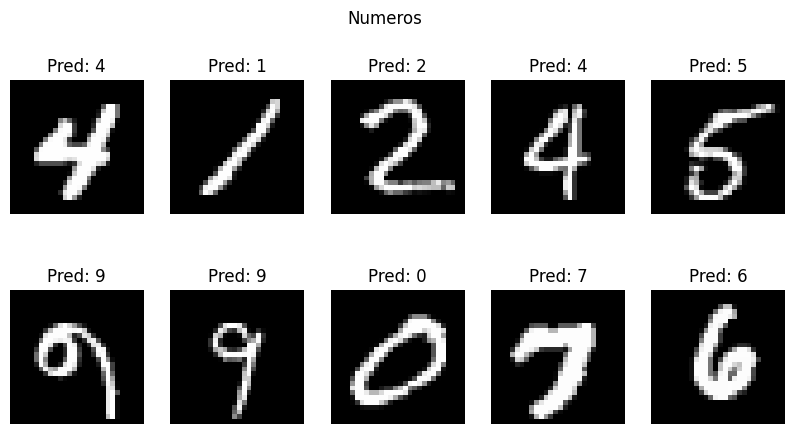

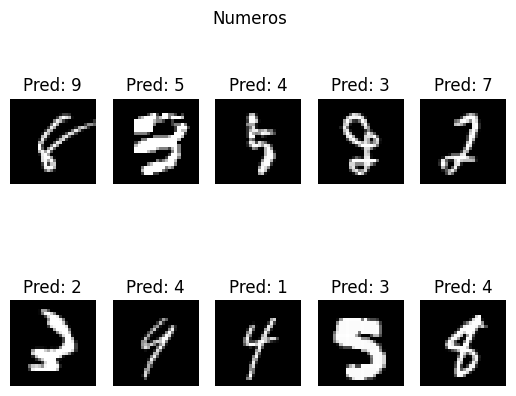

In [177]:
visualize_digits(np.asarray(X_test), y_pred, 'Numeros')